### Developing Linear Regression Model mathematcially

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X= np.array([4,9,10,14, 4,7,12,22, 1,17])
m=len(X)
X=X.reshape(m,1)
print(X)

[[ 4]
 [ 9]
 [10]
 [14]
 [ 4]
 [ 7]
 [12]
 [22]
 [ 1]
 [17]]


In [3]:
Y= np.array([31,58, 65, 73, 37,44,60,91,21, 84])
Y=Y.reshape(len(Y),1)
print(Y)

[[31]
 [58]
 [65]
 [73]
 [37]
 [44]
 [60]
 [91]
 [21]
 [84]]


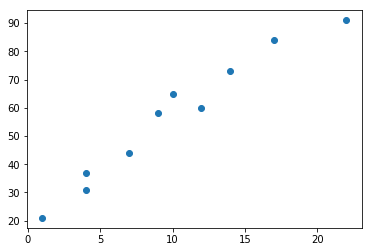

In [4]:
plt.scatter(X,Y)

In [5]:
x_mean=np.mean(X)
y_mean=np.mean(Y)

print("Mean(X) =", x_mean)
print("Mean(Y) =", y_mean)

Mean(X) = 10.0
Mean(Y) = 56.4


In [6]:
num=0
den=0
for i in range(m):
    num+=((X[i]-x_mean)*(Y[i]-y_mean))
    den+=((X[i]-x_mean)**2)

a1=num/den
a0=y_mean-a1*x_mean  
print("Coefficient a0=",a0)
print("Coefficient a1=",a1)

Coefficient a0= [21.69255319]
Coefficient a1= [3.47074468]


In [7]:
y_pred1=a0+a1*X  
print("Predicted values are:\n",y_pred1)

Predicted values are:
 [[35.57553191]
 [52.92925532]
 [56.4       ]
 [70.28297872]
 [35.57553191]
 [45.98776596]
 [63.34148936]
 [98.04893617]
 [25.16329787]
 [80.69521277]]


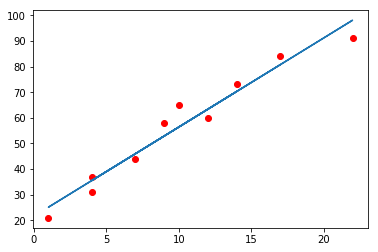

In [8]:
plt.scatter(X,Y, color='red')
plt.plot(X,y_pred1)

In [9]:
# Residuals

residue=Y-y_pred1          # compute error or residuals
print(residue)             # printing all the errors

[[-4.57553191]
 [ 5.07074468]
 [ 8.6       ]
 [ 2.71702128]
 [ 1.42446809]
 [-1.98776596]
 [-3.34148936]
 [-7.04893617]
 [-4.16329787]
 [ 3.30478723]]


In [10]:
print('sum of residue=',sum(residue))   #almost zero

sum of residue= [1.42108547e-14]


In [11]:
rmse = np.sqrt(sum(residue**2)/m)
print("RMSE= ",rmse)

RMSE=  [4.72311541]


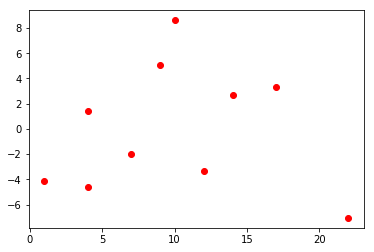

In [12]:
plt.scatter(X,residue,color='red')

In [13]:
# R2 Measure

R2 = 1- sum(residue**2)/sum((Y-y_mean)**2)
print('Coefficient of Determination, R2 =', R2)

Coefficient of Determination, R2 = [0.95305989]


### Using Sklearn Library

The file headbrain.csv explains brain weight of a child based on Gender, Age and Head Size. It has four attributes: 
- Gender: takes two values 1 and 2 indicating Male and Female respectively.
- Age Range: takes two values 1 and 2 for each Gender.
- Head Size: is in cubic centimeters and takes discrete values.
- Brain Weight: is in Grams and takes discrete values.

For the current case-study, use Head Size as independent variable and Brain Weight as dependent variable. Fit a simple linear regression model. Also, predict the Brain Weight of a baby when Head Size is taken as user input.

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [16]:
# Reading Data
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [17]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values         # independent variable
Y = data['Brain Weight(grams)'].values     # dependent variable
print(X)

[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497 3082 3248 3358
 3803 3566 3145 3503 3571 3724 3615 3203 3609 3561 3979 3533 3689 3158
 4005 3181 3479 3642 3632 3069 3394 3703 3165 3354 3000 3687 3556 2773
 3058 

In [18]:
m = len(X)
X = X.reshape((m, 1))

# Model Intialization
reg = LinearRegression()

# Data Fitting
reg = reg.fit(X, Y)

In [20]:
print("a1 = ", reg.coef_)        # a1
print("a0 = ", reg.intercept_)   # a0

a1 =  [0.26342934]
a0 =  325.5734210494426


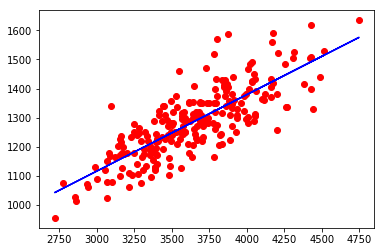

In [21]:
# Model is Y = 325.5734 + 0.2634*X
# Y Prediction

Y_pred = reg.predict(X)
plt.scatter(X,Y, color='red')
plt.plot(X, Y_pred, color = 'blue')

In [22]:
# Model Evaluation
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = r2_score(Y, Y_pred)    #built-in function score() indicates R-squared value

print("RMSE = ", rmse)
print("R2 Score=", r2)

RMSE =  72.1206213783709
R2 Score= 0.639311719957


In this case, R-Square is 63.9%. This means, 63.9% of variance in brain_weight
is explained by head-size. 
In other words, if you know head-size of a baby, you will have 63.9% information to make an accurate prediction about its brain-weight.

In [23]:
# Compute brain-weight of a child, whose head size is read as user-input

user_input = [[int(input("Enter the head-size: "))]]
print("The estimted brain-weight is: ", reg.predict(user_input))

Enter the head-size: 3653
The estimted brain-weight is:  [1287.8807982]


### Second DataSet

The file salary_data.csv explains Salary of an individual based on Years of Experience. 

Split the dataset into Train Set and Test Set.
Fit a simple linear regression model. 
Compute RMSE and R-Square values for predicted values from Test Set.

In [24]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  #for splitting the dataset  sklearn.cross_validation is deprecated
from sklearn.linear_model import LinearRegression   #for linear regression

In [25]:
#import dataset
dataset = pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
x = dataset.iloc[:,:-1].values   #integer-location based indexing
y = dataset.iloc[:,-1].values
#print(x)
x.shape

(30, 1)

The value of random_state parameter can be omitted. If we do not use that parameter, for every run of the code, we will get different train and test sets randomly. So, if we need to do multiple trials on the same data, we may not be able to do comparison. So, it is better to set it to some value.

Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

In practice, one should set the random_state to some fixed number during testing phase. But then remove it in production if you really need a random (and not a fixed) split.

In [27]:
#splitting dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [28]:
#fitting simple linear regression to the training set
regressor = LinearRegression()     #creating an object of the type LinearRegression
regressor.fit(x_train,y_train)    #we should fit the regressor to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("a1=",regressor.coef_)
print("a0=",regressor.intercept_)

a1= [9312.57512673]
a0= 26780.09915062818


In [30]:
#predicting the values for the test set
y_pred = regressor.predict(x_test)# this is prediciting the values for the xtest
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


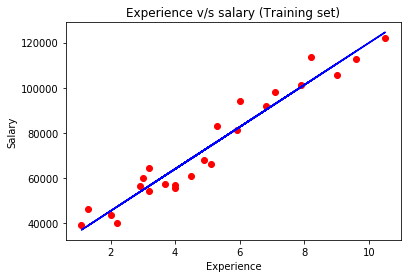

In [31]:
#visualizing the training set results
plt.scatter(x_train,y_train,color='red') #this is the actual data
plt.plot(x_train,regressor.predict(x_train),color='blue') #this is the plot that our algorithm has predicted
plt.title('Experience v/s salary (Training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show() #this is to indicate the end of the plotting and we are ready to plot

In [32]:
# Compute RMSE and R2 measure

from sklearn.metrics import r2_score, mean_squared_error

In [33]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

RMSE= 3580.979237321343


In [34]:
r2=r2_score(y_test,y_pred)
print('Regressor Score is  = ',r2)

Regressor Score is  =  0.988169515729126


In this case, R-Square is 98.8% (This value may differ from person to person, as test and train sets are randomly generated). This means, 98.8% of variance in Salary is explained by Years_of_Experience. In other words, if you know Years_of_Experience of an individual, you will have 98.8% information to make an accurate prediction about his/her Salary.

Text(0.5, 1.0, 'Residual plot')

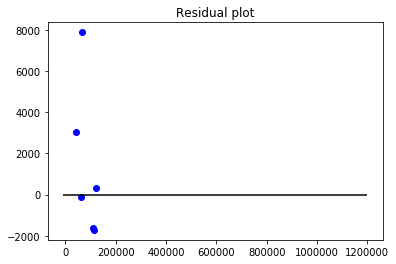

In [35]:
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -10000, xmax=1200000)

plt.title('Residual plot')

In [36]:
user_input = [[int(input("Enter the years of expereince: "))]]
print("The estimted salary is: ", regressor.predict(user_input))

Enter the years of expereince: 5
The estimted salary is:  [73342.97478427]
